In [1]:
library(Seurat)
library(RColorBrewer)
library(stringr)
library("clustree")
library(scales)

Loading required package: ggraph
Loading required package: ggplot2


In [2]:
t1 = read.csv("../Table/PPC_pilot_sequenced_samples.csv")[1:12,]
t1.temp = t1[! is.na(t1$PDX1_NKX61), ]
t1.temp = t1.temp[order(-t1.temp$PDX1_NKX61),]
t1.temp$UDID = gsub("_", "", t1.temp$UDID)
t1.temp = t1.temp[! t1.temp$UDID == "PPC069", ]

In [7]:
out = "/projects/PPC/analysis/ppc_pilot/data/aggr_live_then_integrate/"
f = paste(out, "obj.analyzed.filtered", sep = "")
load(f, verbose = T)

Loading objects:
  tiss.filtered


In [3]:
load("/projects/PPC/analysis/ppc_pilot/data/old/melvin_data/ESB_only_integrated.Robj", verbose = T)

Loading objects:
  integrated


# Figure 1A

In [24]:
# see illustrator files for cartoons

# Figure 1B

In [13]:
PlotUMAP <- function(obj, annotate, lX, lY, text_width, n.col, plot_leg = FALSE, cols2use = NULL){

    options(repr.plot.width = 3, repr.plot.height = 3)
    par(mar = c(4, 4, 1, 1), xpd=FALSE)
    umap = as.data.frame(Embeddings(obj[["umap"]]))
    umap$clusters = obj@meta.data[match(rownames(umap), rownames(obj@meta.data)), annotate]
    
    qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
    col_vector    = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))
    my_color_palette <- hue_pal()(length(unique(umap$clusters)))
    
    if(length(cols2use) > 0){colrs = data.frame(clusters = unique(umap$clusters), color = cols2use)}
    else{colrs = data.frame(clusters = sort(unique(umap$clusters)), color = my_color_palette)}
    umap$color = colrs[match(umap$clusters, colrs$clusters), "color"]
    

    
    plot(umap[, 1], umap[, 2],
         pch = 19, 
         xlab = "UMAP1",
         ylab = "UMAP2",
         col = umap$color,
         cex = .1,
         las = 1)

    if( plot_leg == TRUE){
        legend(lX, lY,
               legend = colrs$clusters,
               col    = colrs$color,
               pch    = rep(16, nrow(colrs)),
               cex=.9,
               bg="transparent",
               box.lty = 0,
               y.intersp = 1.75,
               ncol = n.col,
               x.intersp = 1.15,
               text.width = text_width)
    }
    
    return(colrs)
    
}

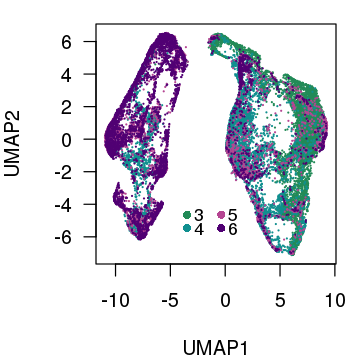

In [95]:
x = PlotUMAP(integrated, "Stage", -4, -4, text_width = 2, n.col = 2, plot_leg = T, cols2use = c("#228a57", "#108f8f", "#b54592", "#500073"))

# Figure 1C

In [18]:
cols = read.csv("../Table/celltype_colors.csv")

In [20]:
colsUSE = cols[cols$celltype %in% (unique(integrated@meta.data$Assigned_cluster)), "col" ][c(7, 6, 5, 8, 2, 4, 11, 1, 9, 10, 3)]

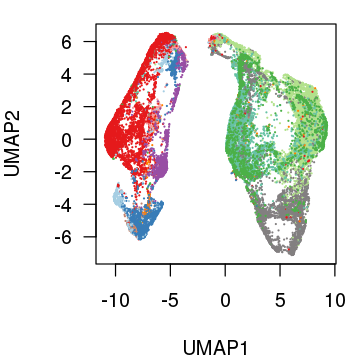

In [23]:
x = PlotUMAP(integrated, "Celltype", -2, 0, text_width = 3, n.col = 2, plot_leg = F, cols2use = colsUSE)

# Figure 1D

In [109]:
PlotFractionStageCelltype <- function(){
    options(repr.plot.width = 3, repr.plot.height = 3)
    par(mar = c(5, 4, 1, 1))

    barfrac = as.matrix(table(integrated@meta.data$Stage, integrated@meta.data$Celltype))
    barfrac_fractions = barfrac

    barfrac_fractions[1,] = barfrac_fractions[1,] / sum(barfrac_fractions[1,])
    barfrac_fractions[2,] = barfrac_fractions[2,] / sum(barfrac_fractions[2,])
    barfrac_fractions[3,] = barfrac_fractions[3,] / sum(barfrac_fractions[3,])
    barfrac_fractions[4,] = barfrac_fractions[4,] / sum(barfrac_fractions[4,])

    my_color_palette <- hue_pal()(ncol(barfrac_fractions))
    colsUSE = cols[cols$celltype %in% (unique(integrated@meta.data$Assigned_cluster)), "col"] #"col" ][c(7, 6, 5, 8, 2, 4, 11, 1, 9, 10, 3)]        
    barplot(t(barfrac_fractions), names.arg = c(3:6), las = 1, col = colsUSE, ylab = "Cluster (%)", xlab = "Stage")
    
#     return(barfrac_fractions)
}

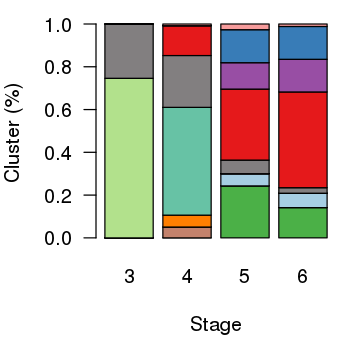

In [110]:
PlotFractionStageCelltype()

# Figure 1E

In [4]:
integrated

An object of class Seurat 
17061 features across 24321 samples within 2 assays 
Active assay: integrated (2000 features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [5]:
res.used <- .1
integrated <- FindNeighbors(integrated, dims = 1:15)
integrated <- FindClusters( integrated, resolution = res.used)

Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 24321
Number of edges: 836813

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9607
Number of communities: 6
Elapsed time: 3 seconds


In [6]:
table(integrated@meta.data$integrated_snn_res.0.1)


   0    1    2    3    4    5 
6497 6397 4807 3019 2340 1261 

In [9]:
x = as.data.frame(table(integrated@meta.data$integrated_snn_res.0.1))
x$frac = (x$Freq / sum(x$Freq) ) * 100
x

Var1,Freq,frac
<fct>,<int>,<dbl>
0,6497,26.713540
1,6397,26.302372
2,4807,19.764812
3,3019,12.413141
4,2340,9.621315
5,1261,5.184820


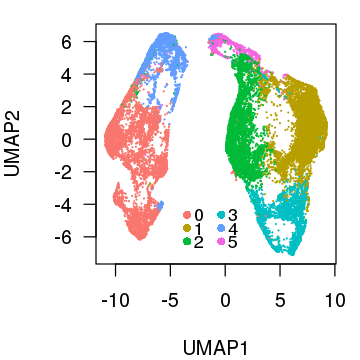

In [73]:
x = PlotUMAP(integrated, "integrated_snn_res.0.1", -4, -4, text_width = 2, n.col = 2, plot_leg = T) #, cols2use = colsUSE)

# Figure 1F

In [111]:
PlotFractionClusterCelltype <- function(){
    options(repr.plot.width = 3, repr.plot.height = 3)
    par(mar = c(5, 4, 1, 1))

    barfrac = as.matrix(table(integrated@meta.data$integrated_snn_res.0.1, integrated@meta.data$Celltype))
    barfrac_fractions = barfrac

    barfrac_fractions[1,] = barfrac_fractions[1,] / sum(barfrac_fractions[1,])
    barfrac_fractions[2,] = barfrac_fractions[2,] / sum(barfrac_fractions[2,])
    barfrac_fractions[3,] = barfrac_fractions[3,] / sum(barfrac_fractions[3,])
    barfrac_fractions[4,] = barfrac_fractions[4,] / sum(barfrac_fractions[4,])
    barfrac_fractions[5,] = barfrac_fractions[5,] / sum(barfrac_fractions[5,])
    barfrac_fractions[6,] = barfrac_fractions[6,] / sum(barfrac_fractions[6,])

    my_color_palette <- hue_pal()(ncol(barfrac_fractions))
    colsUSE = cols[cols$celltype %in% (unique(integrated@meta.data$Assigned_cluster)), "col"] #"col" ][c(7, 6, 5, 8, 2, 4, 11, 1, 9, 10, 3)]        
    barfrac_fractions = barfrac_fractions[c(6, 2, 4, 3, 1, 5), ]
    barplot(t(barfrac_fractions), las = 1, col = colsUSE, ylab = "Cluster (%)", names.arg = rownames(barfrac_fractions), xlab = "Cluster")

#     return(barfrac_fractions)
}

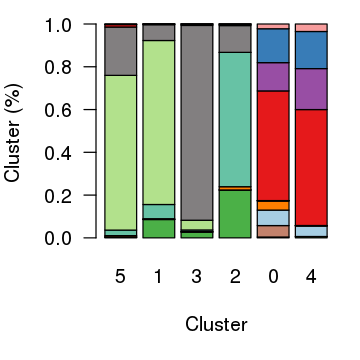

In [112]:
PlotFractionClusterCelltype()

# Figure 1G

In [113]:
PlotFractionClusterStage <- function(){
    options(repr.plot.width = 3, repr.plot.height = 3)
    par(mar = c(5, 4, 1, 1))

    barfrac = as.matrix(table(integrated@meta.data$integrated_snn_res.0.1, integrated@meta.data$Stage))
    barfrac_fractions = barfrac

    barfrac_fractions[1,] = barfrac_fractions[1,] / sum(barfrac_fractions[1,])
    barfrac_fractions[2,] = barfrac_fractions[2,] / sum(barfrac_fractions[2,])
    barfrac_fractions[3,] = barfrac_fractions[3,] / sum(barfrac_fractions[3,])
    barfrac_fractions[4,] = barfrac_fractions[4,] / sum(barfrac_fractions[4,])
    barfrac_fractions[5,] = barfrac_fractions[5,] / sum(barfrac_fractions[5,])
    barfrac_fractions[6,] = barfrac_fractions[6,] / sum(barfrac_fractions[6,])

    my_color_palette <- hue_pal()(ncol(barfrac_fractions))
    colsUSE = cols[cols$celltype %in% (unique(integrated@meta.data$Assigned_cluster)), "col"] #"col" ][c(7, 6, 5, 8, 2, 4, 11, 1, 9, 10, 3)]        
    barfrac_fractions = barfrac_fractions[c(6, 2, 4, 3, 1, 5), ]
    barplot(t(barfrac_fractions), las = 1, col = c("#228a57", "#108f8f", "#b54592", "#500073"), ylab = "Cluster (%)", names.arg = rownames(barfrac_fractions), xlab = "Cluster")

#     return(barfrac_fractions)
}

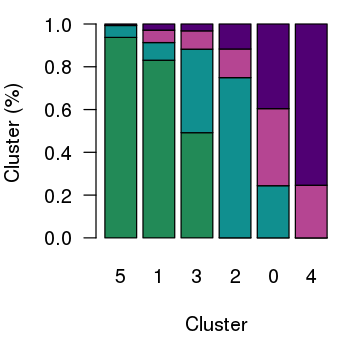

In [114]:
PlotFractionClusterStage()

# Figure 1C

In [5]:
min(t1.temp$PDX1_NKX61)
max(t1.temp$PDX1_NKX61)

[1] 7.48

[1] 91.7

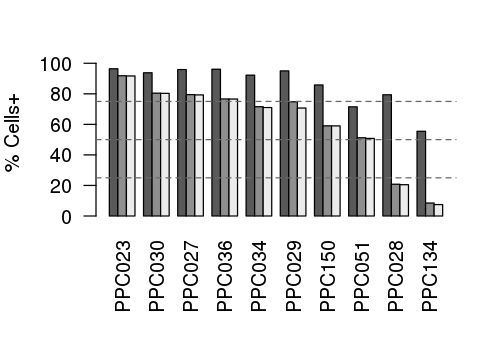

In [19]:
PlotFACS <- function(plot_leg = F){
    
    options(repr.plot.width = 4, repr.plot.height = 3)
    par(mar = c(6, 4, 2, 1))

    x = as.data.frame(t(t1.temp[, c("UDID", "PDX1", "NKX61", "PDX1_NKX61")]))
    colnames(x) = x[1,]
    x = as.matrix(x[2:4,])
    n = rownames(x)
    x = apply(x, 2, as.numeric)

    barplot(as.matrix(x),
            las = 2,
            col = c("#595959", "#8f8f8f", "#ebebeb"),
            beside=T,
            ylim = c(0,110),
            ylab = "% Cells+" )
    abline(h = 25, lty = "dashed", col = "#696969")
    abline(h = 50, lty = "dashed", col = "#696969")
    abline(h = 75, lty = "dashed", col = "#696969")

    if( plot_leg == TRUE){
        legend(26, 110,
               legend=c("% PDX1+", "% NKX6.1+", "% PDX1+/NKX6.1+"),
               fill = c("#595959", "#8f8f8f", "#ebebeb"),
               cex=0.8,
               bg="transparent",
               box.lty = 0,
               y.intersp = 2)
        }
}

PlotFACS()

# Figure 1D

To understand how data was QC'd/processed, see notebook: 0.1_QC_pccs
(i.e. Supplemental Figure 1)

In [18]:
tiss.filtered@meta.data$subject_collapsed = tiss.filtered@meta.data$label2
#matched fresh frozen
tiss.filtered@meta.data[tiss.filtered@meta.data$subject_collapsed == "C0005", "subject_collapsed"] = "C0005_PPC_PPC027"
tiss.filtered@meta.data[tiss.filtered@meta.data$subject_collapsed == "Q0115", "subject_collapsed"] = "Q0115_PPC_PPC023"
tiss.filtered@meta.data[tiss.filtered@meta.data$subject_collapsed == "T104", "subject_collapsed"]  = "T104_PPC_PPC034"
tiss.filtered@meta.data[tiss.filtered@meta.data$subject_collapsed == "T600", "subject_collapsed"]  = "T600_PPC_PPC029"

#only frozen
tiss.filtered@meta.data[tiss.filtered@meta.data$subject_collapsed == "P0353", "subject_collapsed"]  = "P0353_PPC_PPC150"
tiss.filtered@meta.data[tiss.filtered@meta.data$subject_collapsed == "T151", "subject_collapsed"]   = "T151_PPC_PPC051"
tiss.filtered@meta.data[tiss.filtered@meta.data$subject_collapsed == "S02307", "subject_collapsed"] = "S02307_PPC_PPC134"


In [5]:
PlotUMAP <- function(obj, annotate, lX, lY, text_width, n.col, plot_leg = FALSE){

    options(repr.plot.width = 3, repr.plot.height = 3)
    par(mar = c(4, 4, 1, 1), xpd=FALSE)
    umap = as.data.frame(Embeddings(obj[["umap"]]))
    umap$clusters = obj@meta.data[match(rownames(umap), rownames(obj@meta.data)), annotate]
    
    qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
    col_vector    = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))
    my_color_palette <- hue_pal()(length(unique(umap$clusters)))
    
    if(length(unique(umap$clusters)) > 8){colrs = data.frame(clusters = unique(umap$clusters), color = col_vector[1:length(unique(umap$clusters))])}
    else{colrs = data.frame(clusters = sort(unique(umap$clusters)), color = my_color_palette)}
    umap$color = colrs[match(umap$clusters, colrs$clusters), "color"]
    
    plot(umap[, 1], umap[, 2],
         pch = 19, 
         xlab = "UMAP1",
         ylab = "UMAP2",
         col = umap$color,
         cex = .1,
         las = 1)

    if( plot_leg == TRUE){
        legend(lX, lY,
               legend = colrs$clusters,
               col    = colrs$color,
               pch    = rep(16, nrow(colrs)),
               cex=.9,
               bg="transparent",
               box.lty = 0,
               y.intersp = 1.75,
               ncol = n.col,
               x.intersp = 1.15,
               text.width = text_width)
    }
    
    return(umap)
    
}

In [11]:
res.used <- .1
tiss.filtered <- FindNeighbors(tiss.filtered, dims = 1:15)
tiss.filtered <- FindClusters( tiss.filtered, resolution = res.used)

Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 88188
Number of edges: 2612979

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9507
Number of communities: 9
Elapsed time: 38 seconds


In [15]:
x = as.data.frame(table(tiss.filtered@meta.data$RNA_snn_res.0.1))
x$frac = (x$Freq / sum(x$Freq)) *100
x

Var1,Freq,frac
<fct>,<int>,<dbl>
0,52060,59.0329750
1,11184,12.6819976
2,8361,9.4808818
3,5646,6.4022316
4,4139,4.6933823
5,3188,3.6150043
6,2291,2.5978591
7,932,1.0568331
8,387,0.4388352


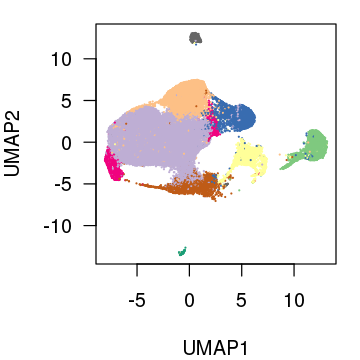

In [311]:
x = PlotUMAP(tiss.filtered, "RNA_snn_res.0.1", 3, 13, text_width = 2, n.col = 2, plot_leg = F)

In [27]:
out = "/projects/PPC/analysis/ppc_pilot/data/aggr_live_then_integrate/"
save(tiss.filtered, file = paste(out, "obj.analyzed.filtered.clustered", sep = ""))

In [136]:
cluster_colors = x[! duplicated(x$clusters), ]
cluster_colors = cluster_colors[order(cluster_colors$clusters), ]$color

# Figure 1E

In [305]:
table(tiss.filtered@meta.data$subject_collapsed)


 C0005_PPC_PPC027  P0353_PPC_PPC150  Q0115_PPC_PPC023 S02307_PPC_PPC134 
            12604              2954             12506              2894 
S08401_PPC_PPC030  T104_iPSC_PPC034   T104_PPC_PPC034   T151_PPC_PPC051 
             9246              8173             11704              2899 
  T452_PPC_PPC028   T600_PPC_PPC029   T600_PPC_PPC036 
             6815             11088              7305 

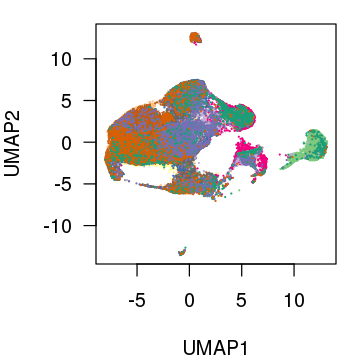

In [312]:
e = PlotUMAP(tiss.filtered, "subject_collapsed", -5, 12, text_width = 5, n.col = 3, plot_leg = F)

In [22]:
as.matrix(table(tiss.filtered@meta.data$RNA_snn_res.0.1, tiss.filtered@meta.data$subject_collapsed))

   
    C0005_PPC_PPC027 P0353_PPC_PPC150 Q0115_PPC_PPC023 S02307_PPC_PPC134
  0             9495             1832             9122               990
  1             2094              457             2123               483
  2                0               13                3               156
  3               10               71               13               687
  4               43               53               50               185
  5              435              275              560               295
  6              405              152              371                72
  7               84               83              147                 2
  8               38               18              117                24
   
    S08401_PPC_PPC030 T104_iPSC_PPC034 T104_PPC_PPC034 T151_PPC_PPC051
  0              6764                0            7142            1757
  1              1708                0            1905             420
  2                 0             8173           

# Figure 1F
https://github.com/satijalab/seurat/issues/1565

https://cran.r-project.org/web/packages/clustree/vignettes/clustree.html

In [49]:
library(scales)

In [159]:
PlotFractionCluster <- function(){
    options(repr.plot.width = 3, repr.plot.height = 3)
    par(mar = c(5, 4, 1, 1))

    barfrac = as.matrix(table(tiss.filtered@meta.data$subject_collapsed, tiss.filtered@meta.data$RNA_snn_res.0.1))
    barfrac_fractions = barfrac

    barfrac_fractions[1,] = barfrac_fractions[1,] / sum(barfrac_fractions[1,])
    barfrac_fractions[2,] = barfrac_fractions[2,] / sum(barfrac_fractions[2,])
    barfrac_fractions[3,] = barfrac_fractions[3,] / sum(barfrac_fractions[3,])
    barfrac_fractions[4,] = barfrac_fractions[4,] / sum(barfrac_fractions[4,])
    barfrac_fractions[5,] = barfrac_fractions[5,] / sum(barfrac_fractions[5,])
    barfrac_fractions[6,] = barfrac_fractions[6,] / sum(barfrac_fractions[6,])
    barfrac_fractions[7,] = barfrac_fractions[7,] / sum(barfrac_fractions[7,])
    barfrac_fractions[8,] = barfrac_fractions[8,] / sum(barfrac_fractions[8,])
    barfrac_fractions[9,] = barfrac_fractions[9,] / sum(barfrac_fractions[9,])
    barfrac_fractions[10,] = barfrac_fractions[10,] / sum(barfrac_fractions[10,])
    barfrac_fractions[11,] = barfrac_fractions[11,] / sum(barfrac_fractions[11,])

    barfrac_fractions = barfrac_fractions[order(-barfrac_fractions[, 1]), ]

    my_color_palette <- hue_pal()(ncol(barfrac_fractions))
    
    qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
    col_vector    = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))
    
    barplot(t(barfrac_fractions), names.arg = str_split_fixed(colnames(t(barfrac_fractions)), "_", 3)[, 3], las = 2, col = cluster_colors, ylab = "Cluster (%)")
    
#     return(barfrac_fractions)
}

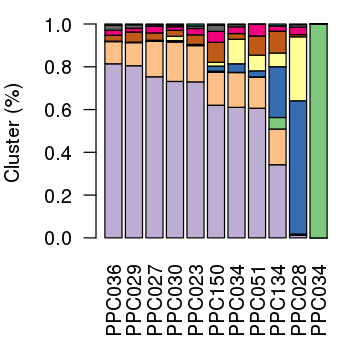

In [160]:
PlotFractionCluster()

# Figure 1G

In [293]:
PlotFractionClusterVSFACS <- function(){
    options(repr.plot.width = 3, repr.plot.height = 3)
    par(mar = c(4, 4, 1, 1), xpd=FALSE)
    
    
    barfrac = as.matrix(table(tiss.filtered@meta.data$subject_collapsed, tiss.filtered@meta.data$RNA_snn_res.0.1))
    barfrac_fractions = barfrac

    barfrac_fractions[1,] = barfrac_fractions[1,] / sum(barfrac_fractions[1,])
    barfrac_fractions[2,] = barfrac_fractions[2,] / sum(barfrac_fractions[2,])
    barfrac_fractions[3,] = barfrac_fractions[3,] / sum(barfrac_fractions[3,])
    barfrac_fractions[4,] = barfrac_fractions[4,] / sum(barfrac_fractions[4,])
    barfrac_fractions[5,] = barfrac_fractions[5,] / sum(barfrac_fractions[5,])
    barfrac_fractions[6,] = barfrac_fractions[6,] / sum(barfrac_fractions[6,])
    barfrac_fractions[7,] = barfrac_fractions[7,] / sum(barfrac_fractions[7,])
    barfrac_fractions[8,] = barfrac_fractions[8,] / sum(barfrac_fractions[8,])
    barfrac_fractions[9,] = barfrac_fractions[9,] / sum(barfrac_fractions[9,])
    barfrac_fractions[10,] = barfrac_fractions[10,] / sum(barfrac_fractions[10,])
    barfrac_fractions[11,] = barfrac_fractions[11,] / sum(barfrac_fractions[11,])

    barfrac_fractions = barfrac_fractions[order(-barfrac_fractions[, 1]), ]
    my_color_palette <- hue_pal()(ncol(barfrac_fractions))

    barfrac_fractions = cbind(barfrac_fractions, gsub("_", "", str_split_fixed(rownames(barfrac_fractions), "_", 3)[,3]))
    barfrac_fractions = cbind(barfrac_fractions, t1.temp[match(barfrac_fractions[, ncol(barfrac_fractions)], t1.temp$UDID), "PDX1_NKX61"]  )
    barfrac_fractions = cbind(barfrac_fractions, t1.temp[match(barfrac_fractions[, ncol(barfrac_fractions) - 1], t1.temp$UDID), "PDX1"]  )
    barfrac_fractions = cbind(barfrac_fractions, t1.temp[match(barfrac_fractions[, ncol(barfrac_fractions) - 2], t1.temp$UDID), "NKX61"]  )

    barfrac_fractions = barfrac_fractions[1:nrow(barfrac_fractions)-1, ] #remove iPSC
    qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
    col_vector    = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))
#     my_color_palette <- hue_pal()(length(unique(umap$clusters)))

    barfrac_fractions = as.data.frame(barfrac_fractions)
    
    x = (as.numeric(barfrac_fractions[,1])) * 100
    y = as.numeric(barfrac_fractions[,"V11"])

    plot(x, y, col = col_vector, pch = 19, cex = 1.5, las = 1, xlim = c(0,100), ylim = c(0,100),
         xlab = "% Clusters 0", ylab = "% PDX1+/NKX6.1+")
    
    
#     text(x, y, rownames(barfrac_fractions))
    
    abline(lm(y ~ x),col = "black")
    p = round(cor.test(y , x, method = "spearman")$p.val, 3)
    rho = round(as.numeric(str_split_fixed(cor.test(y , x, method = "pearson")$estimate, ":", 2)[1]), 2)
    text(0, 90, paste("p = ", p, sep = ""), pos = 4)
    text(0, 80, paste("r = ", rho, sep = ""), pos = 4)
    
#     return(barfrac_fractions)
#     print(rho)
#     print(p)

}

# Figure 1H

In [270]:
PlotGeneExpression <- function(obj){
    options(repr.plot.width = 4.5, repr.plot.height = 3)
    p <- FeaturePlot(obj, features = c("POU5F1", "PDX1", "NKX6-1", "CHGA", "INS", "ESM1"),
                pt.size = .0001, min.cutoff = c(0, 0, 0, 1, 1, 1), max.cutoff = c(1.5, 1.5, 1.5, 10, 10, 2), combine = FALSE, cols = c("#c2c2c210","#910000"))

    for(i in 1:length(p)) {

        p[[i]] <- p[[i]] + NoLegend() + FontSize(main = 8) + NoAxes() 

    }

    cowplot::plot_grid(plotlist = p, ncol = 3)
}


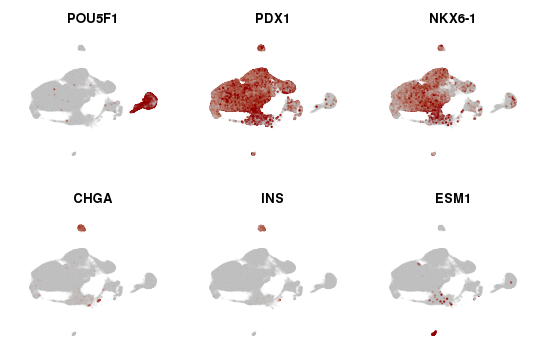

In [271]:
PlotGeneExpression(tiss.filtered)

# Plot 2 Figure

In [272]:
# meta = tiss.filtered_adjusted@meta.data
# meta$Barcodes = rownames(meta)
# meta = meta[, c("final_name", "RNA_snn_res.0.1")]

# write.csv(meta, file = "../Table/frazer_barcodes_meta.csv")

In [281]:
# options(repr.plot.width = 8, repr.plot.height = 8)

# layout(matrix(c(1, 1, 2,
#                 3, 4, 5,
#                 6, 7, 8), 3, 3, byrow = TRUE))




# PlotFACS()
# x = PlotUMAP(tiss.filtered, "subject_collapsed", 16, 16, text_width = 10, n.col = 1)
# x = PlotUMAP(tiss.filtered, "RNA_snn_res.0.1", 7, 16, text_width = 2, n.col = 2)
# PlotFractionCluster()
# PlotFractionClusterVSFACS()
# # PlotGeneExpression(tiss.filtered_adjusted)

In [119]:

out = "../Figures/Manuscript_V04/Figure_1_"

png(paste(out, "UMAP_byStage.png"), width = 3, height = 3, units = "in", res = 1200)
x = PlotUMAP(integrated, "Stage", -4, -4, text_width = 2, n.col = 2, plot_leg = F, cols2use = c("#228a57", "#108f8f", "#b54592", "#500073"))
dev.off()

png(paste(out, "UMAP_byCelltype.png"), width = 3, height = 3, units = "in", res = 1200)
colsUSE = cols[cols$celltype %in% (unique(integrated@meta.data$Assigned_cluster)), "col" ][c(7, 6, 5, 8, 2, 4, 11, 1, 9, 10, 3)]
x = PlotUMAP(integrated, "Celltype", -2, 0, text_width = 3, n.col = 2, plot_leg = F, cols2use = colsUSE)
dev.off()

png(paste(out, "UMAP_byClusterMelton.png"), width = 3, height = 3, units = "in", res = 1200)
x = PlotUMAP(integrated, "integrated_snn_res.0.1", -4, -4, text_width = 2, n.col = 2, plot_leg = F) #, cols2use = colsUSE)
dev.off()

pdf(paste(out, "Stage_barplot.pdf"), width = 3, height = 3)
PlotFractionStageCelltype()
dev.off()

pdf(paste(out, "Celltype_barplot.pdf"), width = 3, height = 3)
PlotFractionClusterCelltype()
dev.off()

pdf(paste(out, "ClusterStage_barplot.pdf"), width = 3, height = 3)
PlotFractionClusterStage()
dev.off()


png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

In [23]:
out = "../Figures/Manuscript_V04/Figure_1_"

pdf(paste(out, "FACS_barplot.pdf"), width = 4, height = 3)
PlotFACS()
dev.off()

png(paste(out, "UMAP_bySubject.png"), width = 3, height = 3, units = "in", res = 1200)
PlotUMAP(tiss.filtered, "subject_collapsed", 16, 16, text_width = 10, n.col = 1)
dev.off()

png(paste(out, "UMAP_byCluster.png"), width = 3, height = 3, units = "in", res = 1200)
PlotUMAP(tiss.filtered, "RNA_snn_res.0.1", 7, 16, text_width = 2, n.col = 2)
dev.off()

pdf(paste(out, "Cluster_barplot.pdf"), width = 3, height = 3)
PlotFractionCluster()
dev.off()

pdf(paste(out, "FACS_pop_scatter.pdf"), width = 3, height = 3)
PlotFractionClusterVSFACS()
dev.off()

png(paste(out, "UMAP_expression.png"), width = 4.5, height = 3, units = "in", res = 1200)
PlotGeneExpression(tiss.filtered)
dev.off()